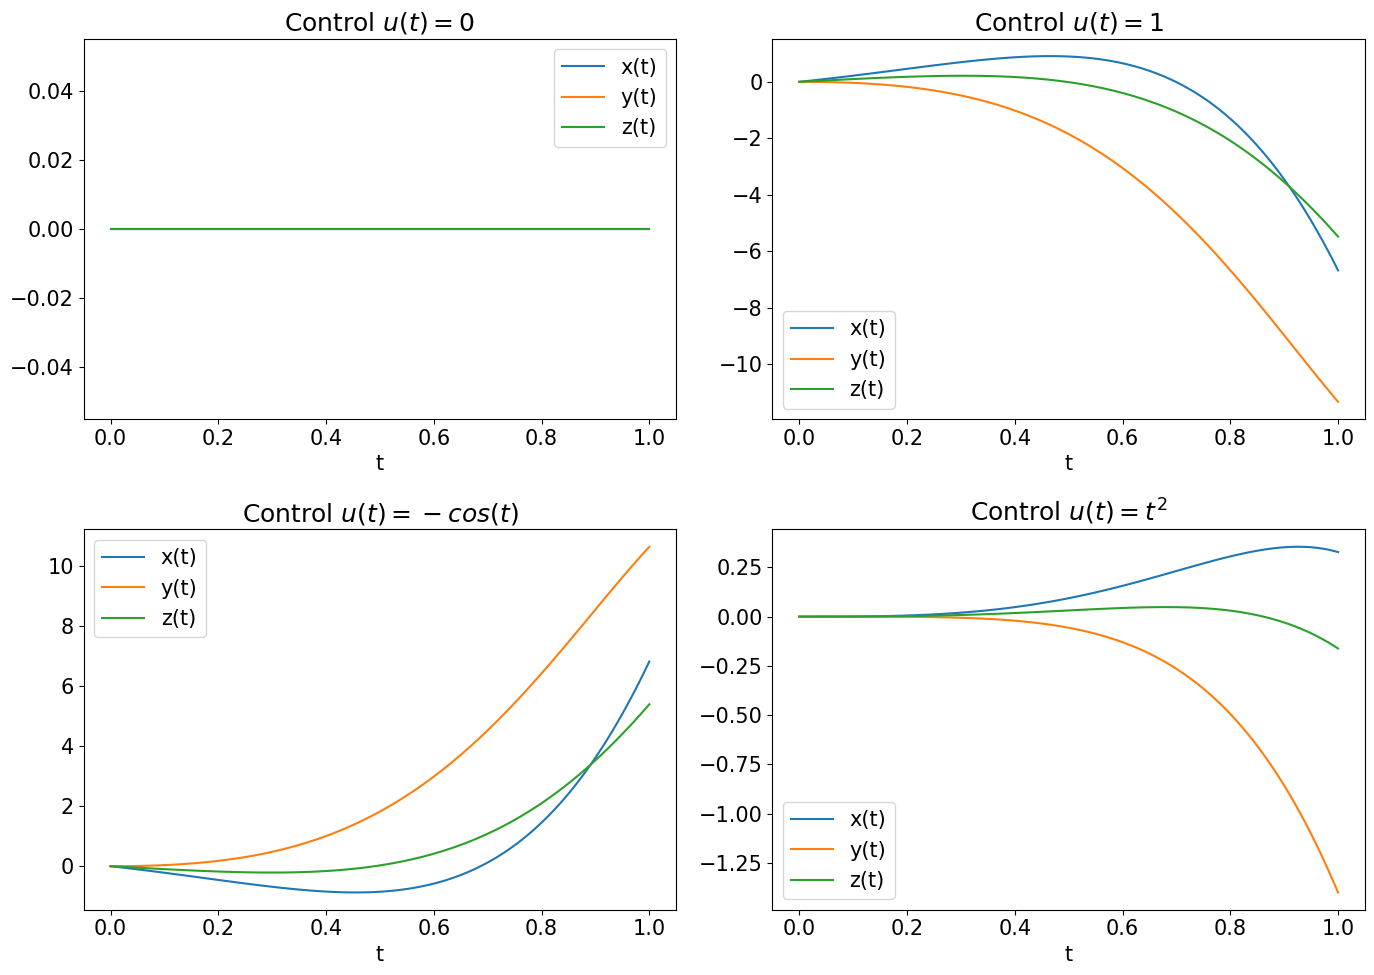

In [9]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
font = {'size'   : 15}
plt.rc('font', **font)

A = np.array([[1, 2, 2], [-5, 3, 4], [0, 2, 0]])
B = np.array([2, 0, 1])

def f(t, y, control):
    return A @ y + B * control(t)


fig, axes = plt.subplots(2, 2, figsize=(14, 10))

controls = [lambda t: 0, lambda t: 1, lambda t: -np.cos(t), lambda t: t**2]
control_names = ['$u(t) = 0$', '$u(t) = 1$', '$u(t) = -cos(t)$', '$u(t) = t^2$']

for i, control in enumerate(controls):
    sol = solve_ivp(f, [0, 1], [0, 0, 0], args=(control,), max_step=0.01)
    axes[i // 2, i % 2].plot(sol.t, sol.y[0], label="x(t)")
    axes[i // 2, i % 2].plot(sol.t, sol.y[1], label="y(t)")
    axes[i // 2, i % 2].plot(sol.t, sol.y[2], label="z(t)")
    axes[i // 2, i % 2].legend(loc="best")
    axes[i // 2, i % 2].set_title(f"Control {control_names[i]}")
    axes[i // 2, i % 2].set_xlabel("t")

fig.tight_layout()
plt.show()